<a href="https://colab.research.google.com/github/hyejinbeck/Seoul_hotplot/blob/main/%08Mapo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 마포구

In [ ]:
############################################

# OS환경 : Mac OS

############################################ 초기셋팅
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import platform
import matplotlib

import warnings
warnings.filterwarnings('ignore')

# 여기서 Matplotlib 코드를 사용하여 그래프 생성 및 표시
%matplotlib inline
from google.colab import files
from google.colab import drive

In [ ]:
# 한글폰트
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
# plt.rc('font', family='NanumGothic')
# plt.rc('font', family='Malgun Gothic') #맑은 고딕으로 설정
# plt.rc('font', family='AppleGothic') #맥
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False  # 부호

Text(0.5, 0, '시간(분)')

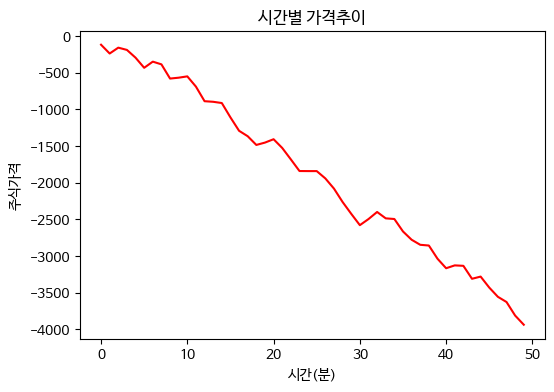

In [ ]:
#################### 한글폰트 깨지는지 확인
test_data = np.random.randint(-200, 100, 50).cumsum()
plt.figure(figsize=(6,4))
plt.plot(range(50), test_data, 'r')
plt.title('시간별 가격추이')
plt.ylabel('주식가격')
plt.xlabel('시간(분)')

#################### 그래도 에러나면 Runtime > Restart runtime 꼭 누르기!

In [ ]:
############################################ 불러오기
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

############################################ 원본 데이터
df_real = pd.read_csv('/content/drive/MyDrive/2조_프로젝트/서울시 상권분석서비스(상권-추정매출).csv', encoding='euc_kr')

# df = pd.read_csv('/content/drive/MyDrive/2조_프로젝트/df_c.csv', encoding='utf-8')

Mounted at /content/drive


NameError: ignored

In [ ]:
weekly_SA = ['월요일_매출_금액','화요일_매출_금액','수요일_매출_금액','목요일_매출_금액','토요일_매출_금액','일요일_매출_금액']
day_SA = ['시간대_00~06_매출_금액','시간대_06~11_매출_금액','시간대_11~14_매출_금액','시간대_14~17_매출_금액','시간대_17~21_매출_금액','시간대_21~24_매출_금액']
age_SA = ['연령대_10_매출_금액','연령대_20_매출_금액','연령대_30_매출_금액','연령대_40_매출_금액','연령대_50_매출_금액','연령대_60_이상_매출_금액']
weekly_SC = ['월요일_매출_건수','화요일_매출_건수','수요일_매출_건수','목요일_매출_건수','금요일_매출_건수','토요일_매출_건수','일요일_매출_건수']
day_SC = ['시간대_건수~06_매출_건수','시간대_건수~11_매출_건수','시간대_건수~14_매출_건수','시간대_건수~17_매출_건수','시간대_건수~21_매출_건수','시간대_건수~24_매출_건수']
age_SC = ['연령대_10_매출_건수','연령대_20_매출_건수','연령대_30_매출_건수','연령대_40_매출_건수','연령대_50_매출_건수','연령대_60_이상_매출_건수']

In [ ]:
# df = df.drop(['기준_년_코드', '상권_코드', '서비스_업종_코드'], axis=1)

# 마포

In [ ]:
df_mapo = df[df['자치구']=='마포구']
df_mapo.shape

(6170, 83)

In [ ]:
# df_mapo
df_mapo_1 = df_mapo[df_mapo['기준_분기_코드'] == 1]
df_mapo_2 = df_mapo[df_mapo['기준_분기_코드'] == 2]
df_mapo_3 = df_mapo[df_mapo['기준_분기_코드'] == 3]
df_mapo_4 = df_mapo[df_mapo['기준_분기_코드'] == 4]
df_mapo_5 = df_mapo[df_mapo['기준_분기_코드'] == 5]
print(df_mapo_1.shape)     # 1 분기
print(df_mapo_2.shape)     # 2 분기
print(df_mapo_3.shape)     # 3 분기
print(df_mapo_4.shape)     # 4 분기
print(df_mapo_5.shape)     # 5 분기

(1280, 83)
(1257, 83)
(1256, 83)
(1237, 83)
(1140, 83)


# 음식점-식사류

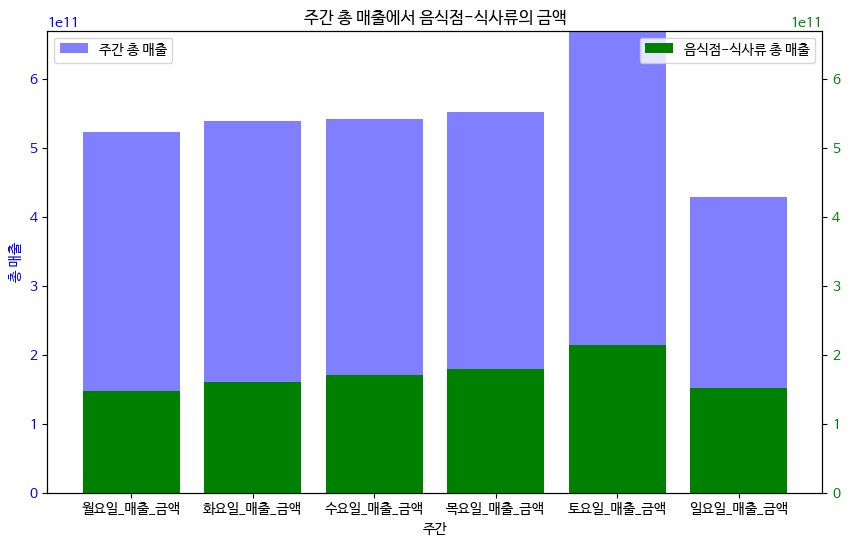

In [ ]:
# 피처에서 주간에 해당하는 매출 금액 선택
weekly_sales = df_mapo[weekly_SA]
# 요일 별 총합
sum_df = weekly_sales.sum()
# 카테고리에서 '음식점-식사류' 선택 및 요일별 매출 금액 값 총합 계산하기
category_food_weekly_sales = df_mapo[df_mapo['카테고리'] == '음식점-식사류'][weekly_SA].sum()
fig, ax = plt.subplots(figsize=(10,6))
# 첫 번째 y축의 막대 그래프
ax.bar(sum_df.index, sum_df.values, label='주간 총 매출', color='b', alpha=0.5)
ax.set_xlabel('주간')
ax.set_ylabel('총 매출', color='b')
ax.tick_params(axis='y', labelcolor='b')
ax.legend(loc='upper left')
# 두 번째 y축의 꺾은선 그래프
ax2 = ax.twinx()
ax2.bar(category_food_weekly_sales.index, category_food_weekly_sales.values , label='음식점-식사류 총 매출', color='g')
ax2.set_ylabel('', color='g')
ax2.tick_params(axis='y', labelcolor='g')
ax2.legend(loc='upper right')
# 두 y축의 범위 통일
ax.set_ylim([0, sum_df.max()])
ax2.set_ylim([0, sum_df.max()])
plt.title('주간 총 매출에서 음식점-식사류의 금액')
plt.show()

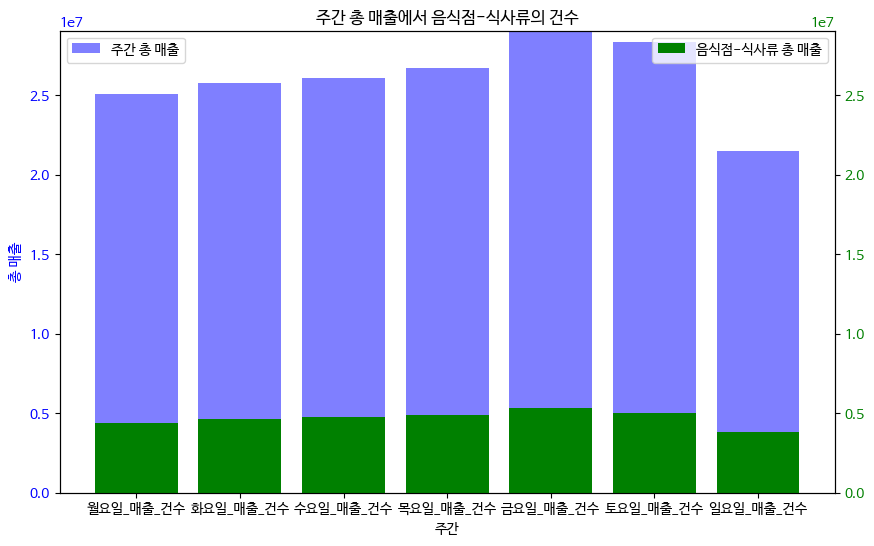

In [ ]:
# 피처에서 주간에 해당하는 매출 건수 선택
weekly_sales_gun = df_mapo[weekly_SC]
# 요일 별 총합
sum_df = weekly_sales_gun.sum()
# 카테고리에서 '음식점-식사류' 선택 및 요일별 매출 금액 값 총합 계산하기
category_food_weekly_gun = df_mapo[df_mapo['카테고리'] == '음식점-식사류'][weekly_SC].sum()
fig, ax = plt.subplots(figsize=(10,6))
# 첫 번째 y축의 막대 그래프
ax.bar(sum_df.index, sum_df.values, label='주간 총 매출', color='b', alpha=0.5)
ax.set_xlabel('주간')
ax.set_ylabel('총 매출', color='b')
ax.tick_params(axis='y', labelcolor='b')
ax.legend(loc='upper left')
# 두 번째 y축의 꺾은선 그래프
ax2 = ax.twinx()
ax2.bar(category_food_weekly_gun.index, category_food_weekly_gun.values , label='음식점-식사류 총 매출', color='g')
ax2.set_ylabel('', color='g')
ax2.tick_params(axis='y', labelcolor='g')
ax2.legend(loc='upper right')
# 두 y축의 범위 통일
ax.set_ylim([0, sum_df.max()])
ax2.set_ylim([0, sum_df.max()])
plt.title('주간 총 매출에서 음식점-식사류의 건수')
plt.show()

In [ ]:
df_mapo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6170 entries, 8800 to 128048
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   자치구              6170 non-null   object 
 1   행정동              6170 non-null   object 
 2   기준_년_코드          6170 non-null   int64  
 3   기준_분기_코드         6170 non-null   int64  
 4   상권_구분_코드         6170 non-null   object 
 5   상권_구분_코드_명       6170 non-null   object 
 6   상권_코드            6170 non-null   int64  
 7   상권_코드_명          6170 non-null   object 
 8   서비스_업종_코드        6170 non-null   object 
 9   서비스_업종_코드_명      6170 non-null   object 
 10  분기당_매출_금액        6170 non-null   float64
 11  분기당_매출_건수        6170 non-null   int64  
 12  주중_매출_비율         6170 non-null   int64  
 13  주말_매출_비율         6170 non-null   int64  
 14  월요일_매출_비율        6170 non-null   int64  
 15  화요일_매출_비율        6170 non-null   int64  
 16  수요일_매출_비율        6170 non-null   int64  
 17  목요일_매출_비율

# 분기별 행정동의 매출 금액과 건수 비교

In [ ]:
df_mapo.describe()

,기준_년_코드,기준_분기_코드,상권_코드,분기당_매출_금액,분기당_매출_건수,주중_매출_비율,주말_매출_비율,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,...,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수
count,6170.000000,6170.000000,6.170000e+03,6.170000e+03,6.170000e+03,6170.000000,6170.000000,6170.000000,6170.000000,6170.000000,...,6170.000000,6170.000000,6170.000000,6170.000000,6170.000000,6170.000000,6170.000000,6170.000000,6170.000000,6170.000000
mean,2022.184765,2.951378,2.301430e+06,6.332366e+08,2.959452e+04,74.702593,25.388331,13.878444,14.511669,14.798703,...,3290.787034,14390.749595,13869.634522,667.417018,8984.916694,7405.066775,4962.339708,4007.717828,2232.881686,11.193031
std,0.388138,1.403941,3.879927e+05,1.903985e+09,9.053403e+04,15.969218,15.982633,10.268962,9.937931,9.779080,...,12451.999687,44178.801272,45202.617677,3354.993161,36324.500169,24350.713850,14002.906561,10016.158271,6020.254483,23.638416
min,2022.000000,1.000000,2.110472e+06,1.270000e+02,2.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2022.000000,2.000000,2.110562e+06,3.311023e+07,6.205000e+02,65.000000,14.000000,9.000000,10.000000,11.000000,...,0.000000,279.250000,223.250000,0.000000,48.250000,104.000000,126.250000,100.000000,37.000000,1.000000
50%,2022.000000,3.000000,2.120193e+06,1.204211e+08,3.249500e+03,74.000000,26.000000,13.000000,14.000000,14.000000,...,69.000000,1576.000000,1402.500000,11.000000,453.500000,668.000000,621.000000,563.500000,269.000000,5.000000
75%,2022.000000,4.000000,2.120243e+06,4.453315e+08,1.734175e+04,86.000000,35.000000,16.000000,17.000000,17.000000,...,1165.250000,8366.250000,7946.750000,166.000000,3746.750000,4103.500000,3097.500000,2742.750000,1480.750000,11.000000
max,2023.000000,5.000000,3.130198e+06,3.555300e+10,1.409185e+06,100.000000,100.000000,100.000000,100.000000,100.000000,...,242088.000000,730981.000000,951432.000000,87373.000000,695723.000000,310013.000000,203848.000000,109727.000000,124671.000000,369.000000


In [ ]:
# '행정동' 별로 '매출_금액_건수'의 합계를 계산
dong_sales_sum = df_mapo.groupby('행정동')['분기당_매출_건수'].sum().reset_index()

# 결과를 새로운 데이터프레임으로 저장
df_dong_sales = pd.DataFrame(dong_sales_sum, columns=['행정동', '분기당_매출_건수'])
dong_sales_sum_sorted = dong_sales_sum.sort_values(by='분기당_매출_건수', ascending=False)
dong_sales_sum_sorted

,행정동,분기당_매출_건수
7,서교동,70103094
5,상암동,19731395
15,합정동,16586658
0,공덕동,9107789
9,성산2동,8518511
3,망원1동,8422643
6,서강동,7637621
4,망원2동,7153884
14,용강동,6111282
2,도화동,5559015


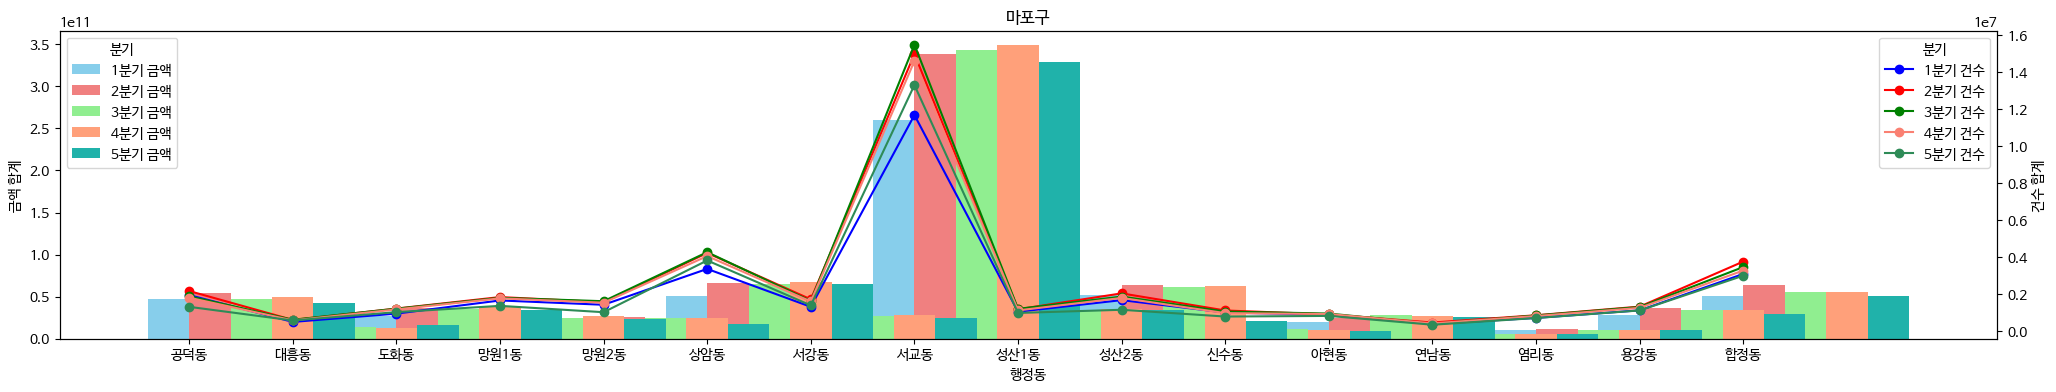

In [ ]:
############################################마포구
five_each_gun_sum =df_mapo.groupby(['행정동', '기준_분기_코드'])['분기당_매출_건수'].sum().unstack()
five_each_money_sum = df_mapo.groupby(['행정동', '기준_분기_코드'])['분기당_매출_금액'].sum().unstack()
############################################ 위의 두 그래프를 한꺼번에 비교

# 바 차트 및 라인 차트 생성
fig, ax1 = plt.subplots(figsize=(25, 4))

# X축 라벨
x = range(len(five_each_money_sum))
x_labels = five_each_money_sum.index

# '금액' 합계 바 차트 그리기
width = 0.4
ax1.bar([i - width/2 for i in x], five_each_money_sum[1], width=width, label='1분기 금액', color='skyblue')
ax1.bar([i + width/2 for i in x], five_each_money_sum[2], width=width, label='2분기 금액', color='lightcoral')
ax1.bar([i + 3 * width/2 for i in x], five_each_money_sum[3], width=width, label='3분기 금액', color='lightgreen')
ax1.bar([i + 5 * width/2 for i in x], five_each_money_sum[4], width=width, label='4분기 금액', color='lightsalmon')
ax1.bar([i + 7 * width/2 for i in x], five_each_money_sum[5], width=width, label='5분기 금액', color='lightseagreen')

# '건수' 합계 라인 차트 그리기
ax2 = ax1.twinx()
ax2.plot(x, five_each_gun_sum[1], marker='o', label='1분기 건수', color='blue')
ax2.plot(x, five_each_gun_sum[2], marker='o', label='2분기 건수', color='red')
ax2.plot(x, five_each_gun_sum[3], marker='o', label='3분기 건수', color='green')
ax2.plot(x, five_each_gun_sum[4], marker='o', label='4분기 건수', color='salmon')
ax2.plot(x, five_each_gun_sum[5], marker='o', label='5분기 건수', color='seagreen')

# X축 라벨 설정
ax1.set_xticks(x)
ax1.set_xticklabels(x_labels)
ax1.set_xlabel('행정동')
ax1.set_ylabel('금액 합계')
ax2.set_ylabel('건수 합계')

# 제목과 범례 설정
ax1.set_title('마포구')
ax1.legend(loc='upper left', title='분기')
ax2.legend(loc='upper right', title='분기')

plt.show()

<Figure size 1500x700 with 0 Axes>

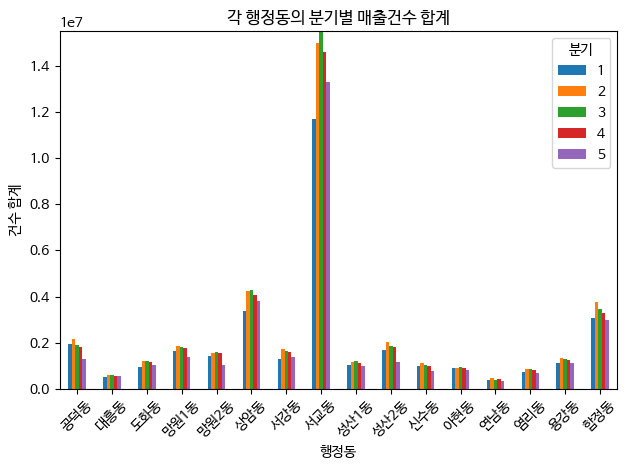

In [ ]:
df_mapo['행정동'].nunique() # 16개

# '행정동' 및 '기준_분기_코드'를 기준으로 '분기당_매출_건수'의 합계를 계산
each_dong_gun_sum = df_mapo.groupby(['행정동', '기준_분기_코드'])['분기당_매출_건수'].sum().unstack()

# 막대 그래프 생성
plt.figure(figsize=(15, 7))  # 그래프 크기를 필요에 맞게 조정합니다

each_dong_gun_sum.plot(kind='bar')
plt.xlabel('행정동')
plt.ylabel('건수 합계')
plt.title('각 행정동의 분기별 매출건수 합계')
plt.xticks(rotation=45)  # x-축 레이블을 가독성 있게 회전시킵니다
plt.legend(title='분기', labels=['1', '2', '3', '4', '5'])
plt.ylim(0, each_dong_gun_sum.values.max() + 1000)  # 필요에 따라 y-축 범위를 조정합니다

plt.tight_layout()
plt.show()

<Figure size 1500x700 with 0 Axes>

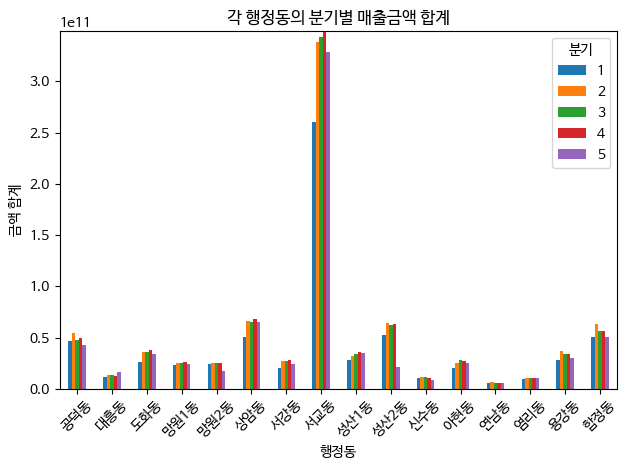

In [ ]:
df_mapo['행정동'].nunique() # 16개

# '행정동' 및 '기준_분기_코드'를 기준으로 '분기당_매출_금액'의 합계를 계산
each_dong_won_sum = df_mapo.groupby(['행정동', '기준_분기_코드'])['분기당_매출_금액'].sum().unstack()

# 막대 그래프 생성
plt.figure(figsize=(15, 7))  # 그래프 크기를 필요에 맞게 조정합니다

each_dong_won_sum.plot(kind='bar')
plt.xlabel('행정동')
plt.ylabel('금액 합계')
plt.title('각 행정동의 분기별 매출금액 합계')
plt.xticks(rotation=45)  # x-축 레이블을 가독성 있게 회전시킵니다
plt.legend(title='분기', labels=['1', '2', '3', '4', '5'])
plt.ylim(0, each_dong_won_sum.values.max() + 1000)  # 필요에 따라 y-축 범위를 조정합니다

plt.tight_layout()
plt.show()

# 서교동

In [ ]:
df_seo = df_mapo[df_mapo['행정동'] == '서교동']
df_seo.shape        # df_seo.shape
df_seo['카테고리'].unique()

array(['음식점-식사류', '음식점-간편식', '음식점-주류', '카페/음료', '교육', '운동/스포츠', '의료/병원',
       '유흥/오락', '자동차', '뷰티/시술', '생활/식품', '의류/잡화', '취미', '가전/가구', '숙박시설',
       '기타'], dtype=object)

<Figure size 1500x700 with 0 Axes>

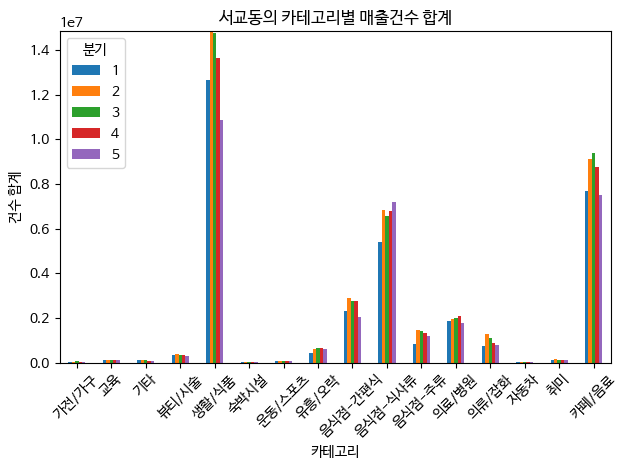

In [ ]:
# '카테고리' 및 '기준_분기_코드'를 기준으로 '분기당_매출_건수'의 합계를 계산
seo_won_sum = df_mapo.groupby(['카테고리', '기준_분기_코드'])['분기당_매출_건수'].sum().unstack()

# 막대 그래프 생성
plt.figure(figsize=(15, 7))  # 그래프 크기를 필요에 맞게 조정합니다

seo_won_sum.plot(kind='bar')
plt.xlabel('카테고리')
plt.ylabel('건수 합계')
plt.title('서교동의 카테고리별 매출건수 합계')
plt.xticks(rotation=45)  # x-축 레이블을 가독성 있게 회전시킵니다
plt.legend(title='분기', labels=['1', '2', '3', '4', '5'])
plt.ylim(0, seo_won_sum.values.max() + 1000)  # 필요에 따라 y-축 범위를 조정합니다

plt.tight_layout()
plt.show()

In [ ]:
df_seo['카테고리'].unique()

array(['음식점-식사류', '음식점-간편식', '음식점-주류', '카페/음료', '교육', '운동/스포츠', '의료/병원',
       '유흥/오락', '자동차', '뷰티/시술', '생활/식품', '의류/잡화', '취미', '가전/가구', '숙박시설',
       '기타'], dtype=object)

<Figure size 1500x700 with 0 Axes>

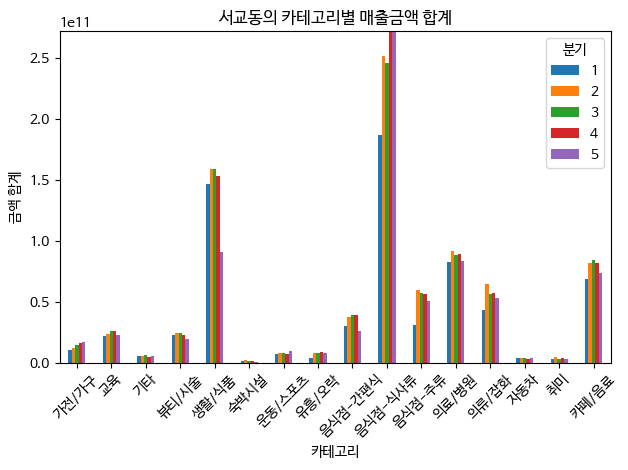

In [ ]:
# '카테고리' 및 '기준_분기_코드'를 기준으로 '분기당_매출_금액'의 합계를 계산
seo_won_sum = df_mapo.groupby(['카테고리', '기준_분기_코드'])['분기당_매출_금액'].sum().unstack()

# 막대 그래프 생성
plt.figure(figsize=(15, 7))  # 그래프 크기를 필요에 맞게 조정합니다

seo_won_sum.plot(kind='bar')
plt.xlabel('카테고리')
plt.ylabel('금액 합계')
plt.title('서교동의 카테고리별 매출금액 합계')
plt.xticks(rotation=45)  # x-축 레이블을 가독성 있게 회전시킵니다
plt.legend(title='분기', labels=['1', '2', '3', '4', '5'])
plt.ylim(0, seo_won_sum.values.max() + 1000)  # 필요에 따라 y-축 범위를 조정합니다

plt.tight_layout()
plt.show()

In [ ]:
df_seo.columns

Index(['자치구', '행정동', '기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드',
       '상권_코드_명', '서비스_업종_코드', '서비스_업종_코드_명', '분기당_매출_금액', '분기당_매출_건수',
       '주중_매출_비율', '주말_매출_비율', '월요일_매출_비율', '화요일_매출_비율', '수요일_매출_비율',
       '목요일_매출_비율', '금요일_매출_비율', '토요일_매출_비율', '일요일_매출_비율', '시간대_00~06_매출_비율',
       '시간대_06~11_매출_비율', '시간대_11~14_매출_비율', '시간대_14~17_매출_비율',
       '시간대_17~21_매출_비율', '시간대_21~24_매출_비율', '남성_매출_비율', '여성_매출_비율',
       '연령대_10_매출_비율', '연령대_20_매출_비율', '연령대_30_매출_비율', '연령대_40_매출_비율',
       '연령대_50_매출_비율', '연령대_60_이상_매출_비율', '주중_매출_금액', '주말_매출_금액', '월요일_매출_금액',
       '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액',
       '일요일_매출_금액', '시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액',
       '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', '남성_매출_금액',
       '여성_매출_금액', '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액',
       '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액', '주중_매출_건수',
       '주말_매출_건수', '월요일_매출_건수', '화요일_매출_건수', '수요일_매출_건수'

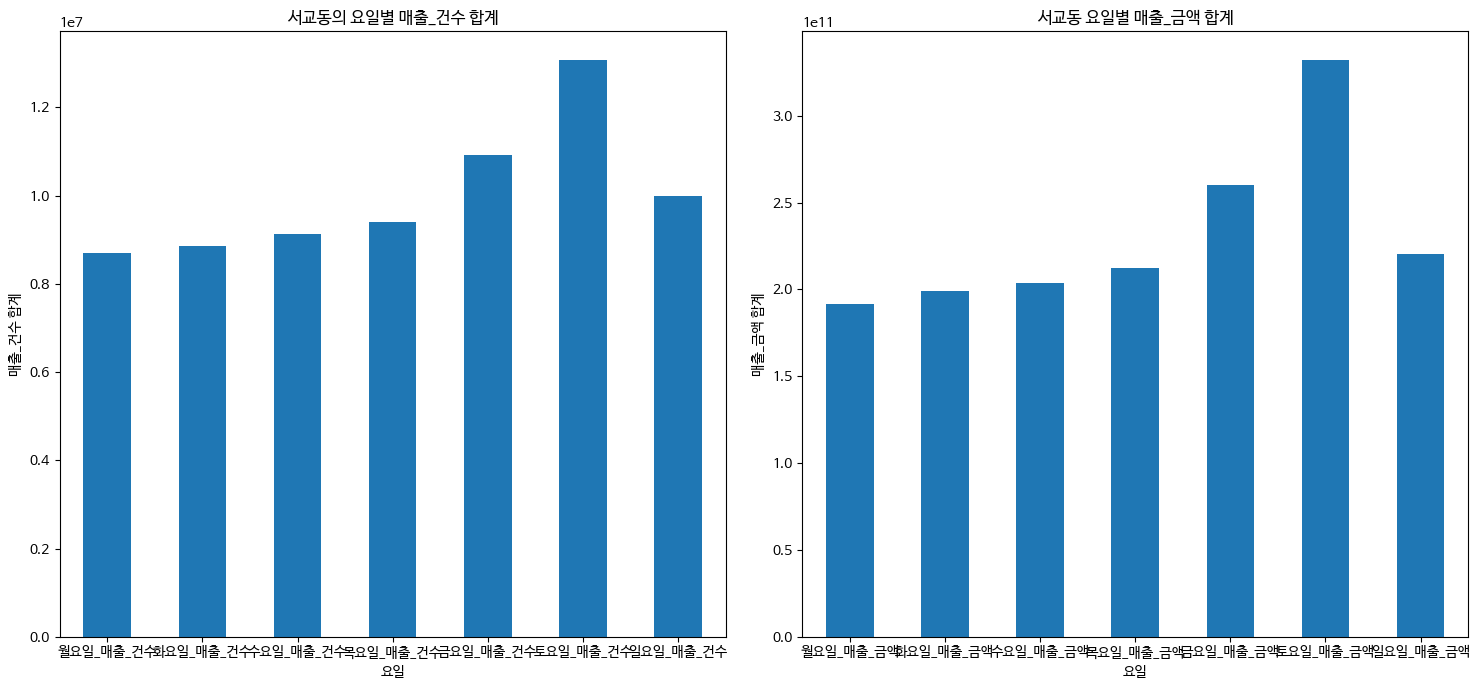

In [ ]:
# 서교동 요일 매출 비교
weekly_SA = ['월요일_매출_금액','화요일_매출_금액','수요일_매출_금액','목요일_매출_금액','금요일_매출_금액', '토요일_매출_금액','일요일_매출_금액']
weekly_SC = ['월요일_매출_건수','화요일_매출_건수','수요일_매출_건수','목요일_매출_건수','금요일_매출_건수','토요일_매출_건수','일요일_매출_건수']
# 서교동 데이터프레임
df_seo

# 'weekly_SC' 컬럼만 추출
weekly_sc_data = df_seo[weekly_SC]

# 'weekly_SA' 컬럼만 추출
weekly_sa_data = df_seo[weekly_SA]

# 요일별 매출  합계 계산
total_sales_sc_by_week = weekly_sc_data.sum()
total_sales_sa_by_week = weekly_sa_data.sum()


# 그래프 그리기
plt.figure(figsize=(15, 7))

# 첫 번째 그래프: 요일별 매출_건수 합계
plt.subplot(1, 2, 1)
total_sales_sc_by_week.plot(kind='bar')
plt.xlabel('요일')
plt.ylabel('매출_건수 합계')
plt.title('서교동의 요일별 매출_건수 합계')
plt.xticks(rotation=0)

# 두 번째 그래프: 요일별 매출_금액 합계
plt.subplot(1, 2, 2)
total_sales_sa_by_week.plot(kind='bar')
plt.xlabel('요일')
plt.ylabel('매출_금액 합계')
plt.title('서교동 요일별 매출_금액 합계')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


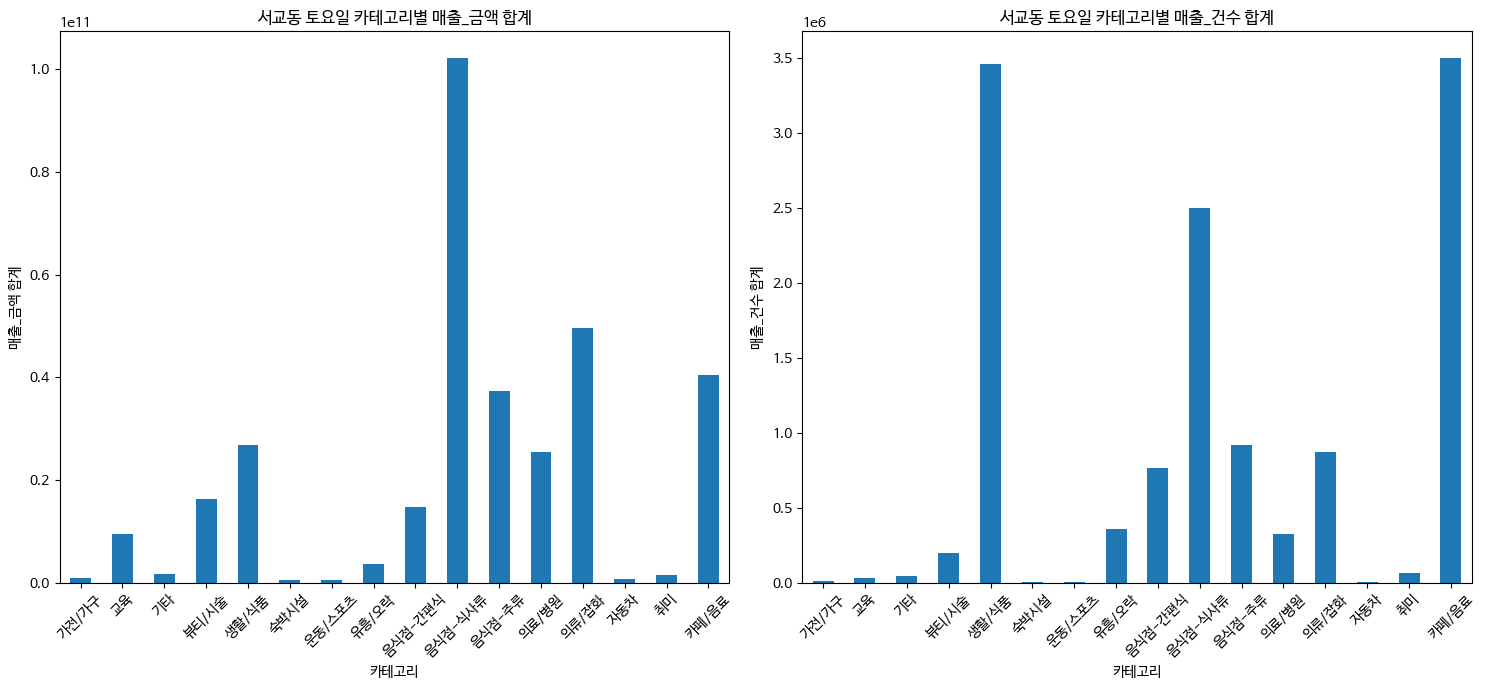

In [ ]:
# 서교동 토요일 컬럼만 추출
sat_won_data = df_seo['토요일_매출_금액']
sat_gun_data = df_seo['토요일_매출_건수']

# '카테고리'를 기준으로 '매출_금액'의 합계 구하기
sat_won_data_by_category = sat_won_data.groupby(df_seo['카테고리']).sum()

# '카테고리'를 기준으로 '매출_건수'의 합계 구하기
sat_gun_data_by_category = sat_gun_data.groupby(df_seo['카테고리']).sum()

# 그래프 그리기
plt.figure(figsize=(15, 7))

# 토요일 매출_금액 그래프
plt.subplot(1, 2, 1)
sat_won_data_by_category.plot(kind='bar')
plt.xlabel('카테고리')
plt.ylabel('매출_금액 합계')
plt.title('서교동 토요일 카테고리별 매출_금액 합계')
plt.xticks(rotation=45)

# 토요일 매출_건수 그래프
plt.subplot(1, 2, 2)
sat_gun_data_by_category.plot(kind='bar')
plt.xlabel('카테고리')
plt.ylabel('매출_건수 합계')
plt.title('서교동 토요일 카테고리별 매출_건수 합계')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



<Figure size 2500x500 with 0 Axes>

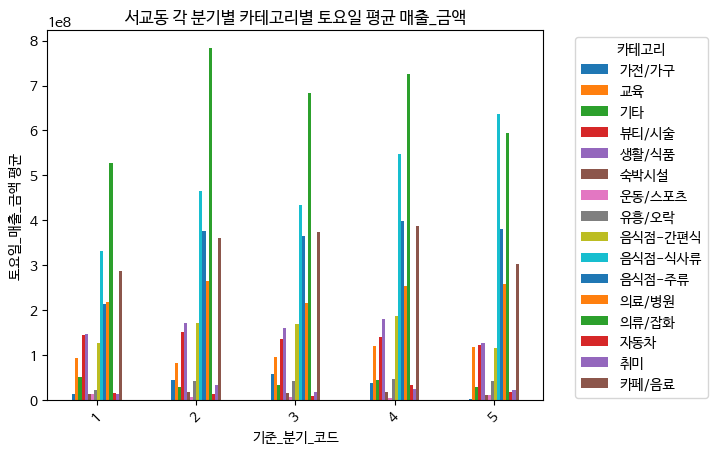

In [ ]:
# '기준_분기_코드'와 '카테고리'를 기준으로 '토요일_매출_금액'의 평균 구하기
sat_won_data_by_quarter = df_seo.groupby(['기준_분기_코드', '카테고리'])['토요일_매출_금액'].mean().unstack()

# 그래프 그리기
plt.figure(figsize=(25, 5))

# 각 분기별로 카테고리를 나타내는 막대 그래프 그리기
sat_won_data_by_quarter.plot(kind='bar')
plt.xlabel('기준_분기_코드')
plt.ylabel('토요일_매출_금액 평균')
plt.title('서교동 각 분기별 카테고리별 토요일 평균 매출_금액')
plt.xticks(rotation=45)
plt.legend(title='카테고리', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


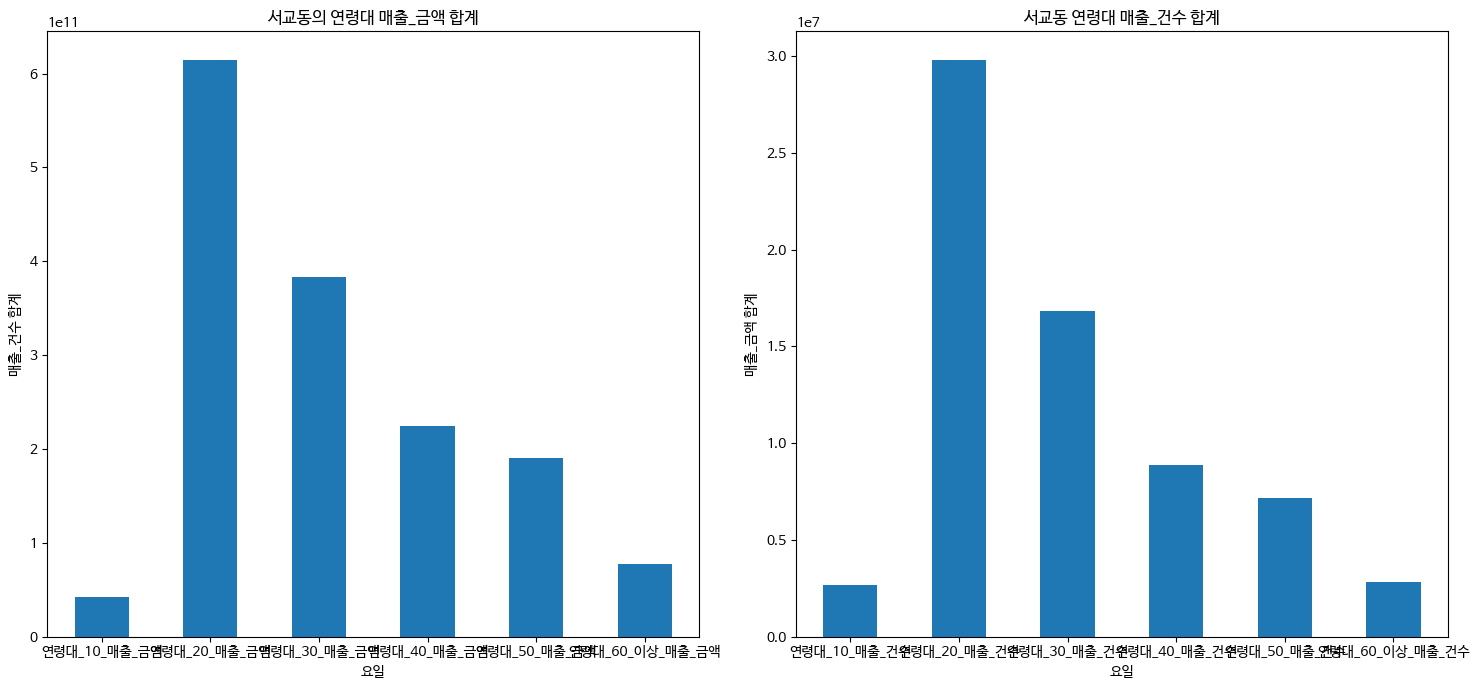

In [ ]:
# 서교동 연령대 매출 비교
age_SA = ['연령대_10_매출_금액','연령대_20_매출_금액','연령대_30_매출_금액','연령대_40_매출_금액','연령대_50_매출_금액','연령대_60_이상_매출_금액']
age_SC = ['연령대_10_매출_건수','연령대_20_매출_건수','연령대_30_매출_건수','연령대_40_매출_건수','연령대_50_매출_건수','연령대_60_이상_매출_건수']

# 서교동 데이터프레임
df_seo

# 연령대 매출 금액 및 건수 비교
age_sa_data = df_seo[age_SA]
age_sc_data = df_seo[age_SC]

# 연령대 매출  합계 계산
total_age_sa_data = age_sa_data.sum()
total_age_sc_data = age_sc_data.sum()

# 그래프 그리기
plt.figure(figsize=(15, 7))

# 첫 번째 그래프: 연령대 매출_건수 합계
plt.subplot(1, 2, 1)
total_age_sa_data.plot(kind='bar')
plt.xlabel('요일')
plt.ylabel('매출_건수 합계')
plt.title('서교동의 연령대 매출_금액 합계')
plt.xticks(rotation=0)

# 두 번째 그래프: 연령대 매출_금액 합계
plt.subplot(1, 2, 2)
total_age_sc_data.plot(kind='bar')
plt.xlabel('요일')
plt.ylabel('매출_금액 합계')
plt.title('서교동 연령대 매출_건수 합계')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

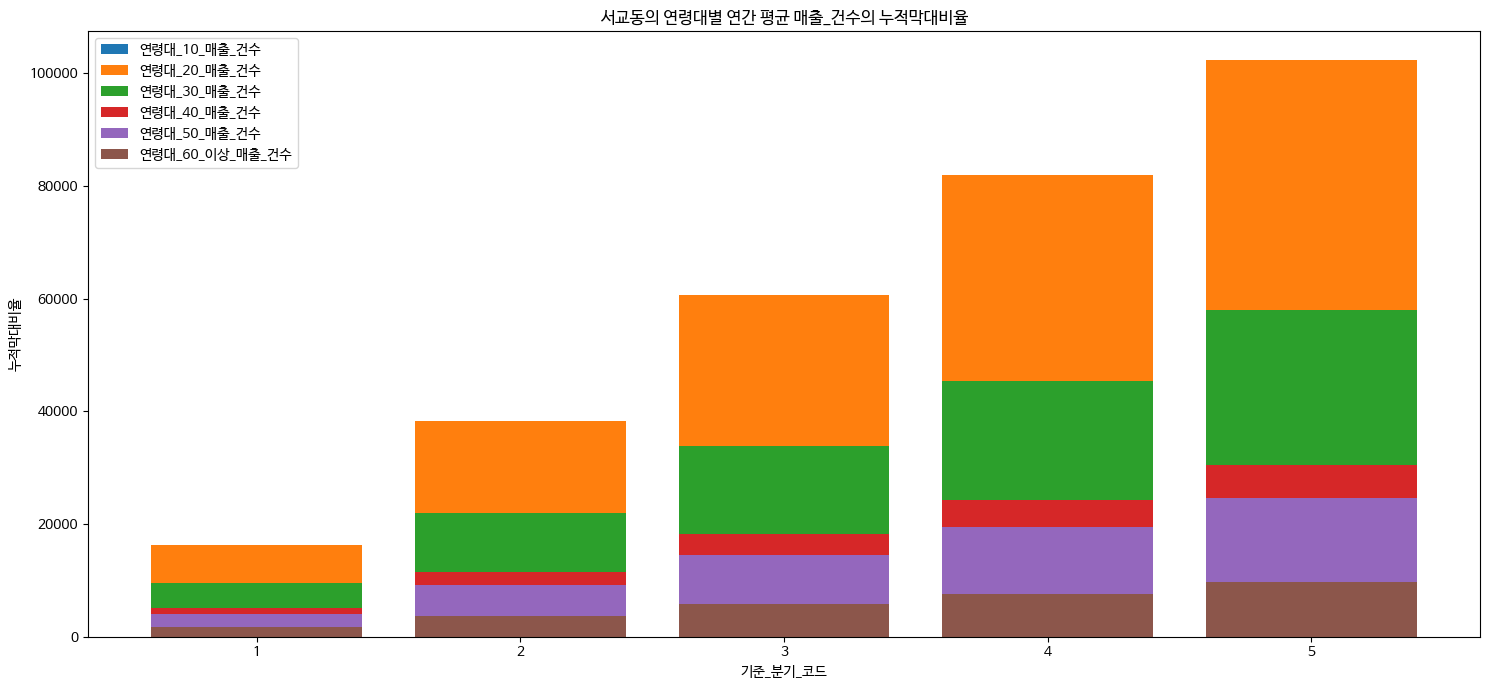

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 서교동 데이터프레임 (이 데이터프레임에는 '기준_분기_코드'와 연령대별 매출_건수가 있어야 합니다.)
# df_seo = ...

# 연령대별 매출 건수 컬럼 선택
age_sc_data = df_seo[age_SC]

# 기준_분기_코드로 그룹화하여 각 분기별 연령대 매출_건수의 평균 계산
quarterly_mean_age_sc = age_sc_data.groupby(df_seo['기준_분기_코드']).mean()

# 누적막대비율을 계산하기 위해 누적합을 구합니다.
cumulative_data = quarterly_mean_age_sc.cumsum()

# 그래프 그리기
plt.figure(figsize=(15, 7))

# 누적막대비율 그래프 그리기
for age_group in age_SC:
    plt.bar(cumulative_data.index, cumulative_data[age_group], label=age_group)

plt.xlabel('기준_분기_코드')
plt.ylabel('누적막대비율')
plt.title('서교동의 연령대별 연간 평균 매출_건수의 누적막대비율')
plt.legend(loc='upper left')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


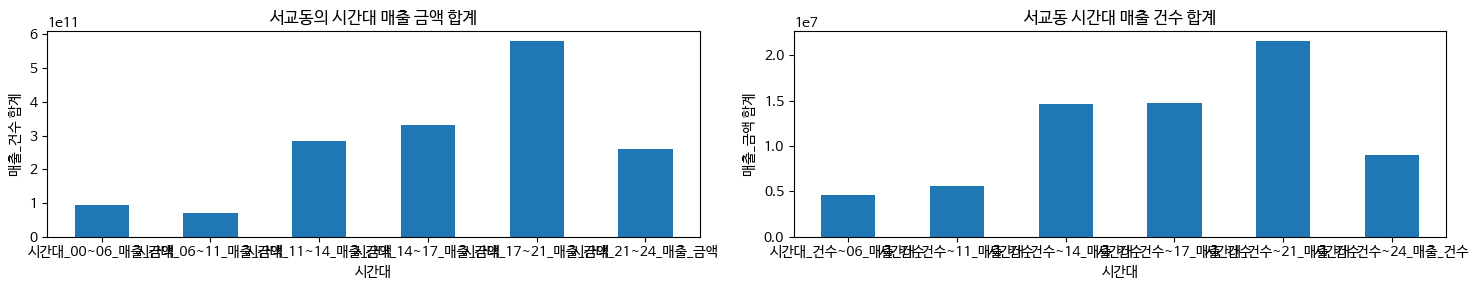

In [ ]:
# 서교동 시간대 매출 비교
day_SA = ['시간대_00~06_매출_금액','시간대_06~11_매출_금액','시간대_11~14_매출_금액','시간대_14~17_매출_금액','시간대_17~21_매출_금액','시간대_21~24_매출_금액']
day_SC = ['시간대_건수~06_매출_건수','시간대_건수~11_매출_건수','시간대_건수~14_매출_건수','시간대_건수~17_매출_건수','시간대_건수~21_매출_건수','시간대_건수~24_매출_건수']
# 서교동 데이터프레임
df_seo

# 시간대 매출 금액 및 건수 비교
day_sa_data = df_seo[day_SA]
day_sc_data = df_seo[day_SC]

# 시간대 매출  합계 계산
total_day_sa_data = day_sa_data.sum()
total_day_sc_data = day_sc_data.sum()

# 그래프 그리기
plt.figure(figsize=(15, 3))

# 첫 번째 그래프: 시간대 매출_건수 합계
plt.subplot(1, 2, 1)
total_day_sa_data.plot(kind='bar')
plt.xlabel('시간대')
plt.ylabel('매출_건수 합계')
plt.title('서교동의 시간대 매출 금액 합계')
plt.xticks(rotation=0)

# 두 번째 그래프: 시간대 매출_금액 합계
plt.subplot(1, 2, 2)
total_day_sc_data.plot(kind='bar')
plt.xlabel('시간대')
plt.ylabel('매출_금액 합계')
plt.title('서교동 시간대 매출 건수 합계')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

<Figure size 2500x500 with 0 Axes>

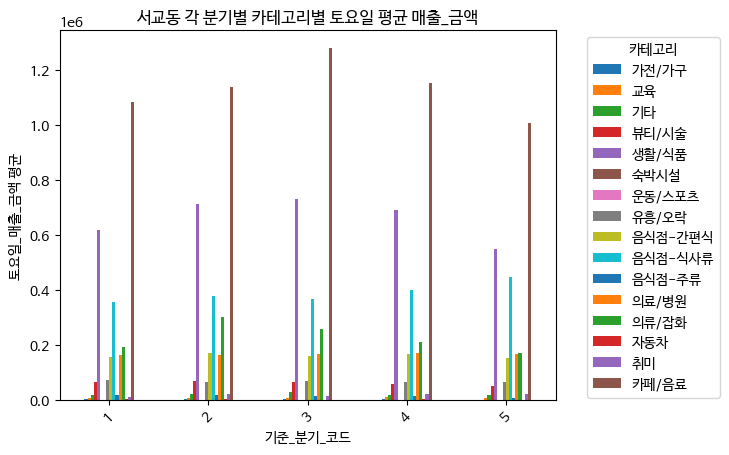

In [ ]:
# 시간대_건수~17_매출_건수 의 '카테고리'
sat_won_data_by_quarter = df_seo.groupby(['기준_분기_코드', '카테고리'])['시간대_건수~17_매출_건수'].sum().unstack()

# 그래프 그리기
plt.figure(figsize=(25, 5))

# 각 분기별로 카테고리를 나타내는 막대 그래프 그리기
sat_won_data_by_quarter.plot(kind='bar')
plt.xlabel('기준_분기_코드')
plt.ylabel('토요일_매출_금액 평균')
plt.title('서교동 각 분기별 카테고리별 토요일 평균 매출_금액')
plt.xticks(rotation=45)
plt.legend(title='카테고리', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

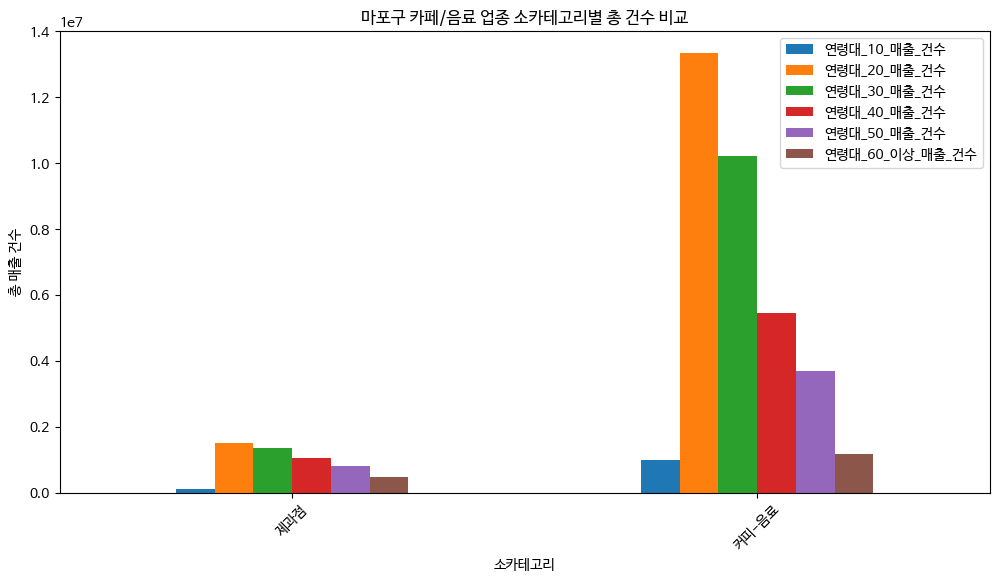

In [ ]:
grouped = df_mapo[df_mapo['카테고리'] == '카페/음료']
grouped = grouped.groupby('서비스_업종_코드_명')[age_SC].sum()
grouped

# 필요한 열만 선택
selected_columns = ['연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수', '연령대_40_매출_건수', '연령대_50_매출_건수', '연령대_60_이상_매출_건수']
grouped = grouped[selected_columns]

# 막대 그래프 그리기
grouped.plot(kind='bar', figsize=(12, 6))
plt.title('마포구 카페/음료 업종 소카테고리별 총 건수 비교')
plt.xlabel('소카테고리')
plt.ylabel('총 매출 건수')
plt.xticks(rotation=45)

plt.show()

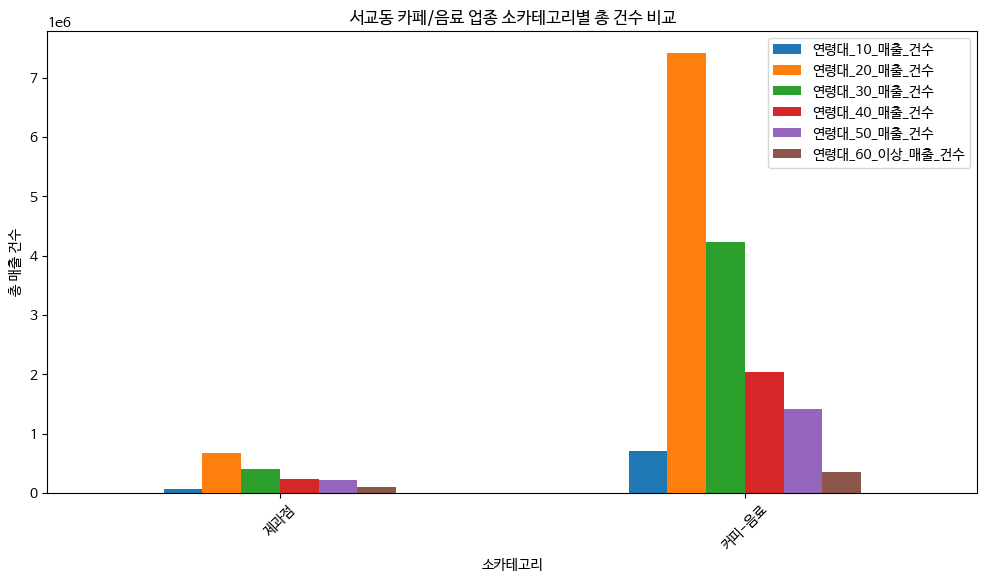

In [ ]:
grouped = df_seo[df_seo['카테고리'] == '카페/음료']
grouped = grouped.groupby('서비스_업종_코드_명')[age_SC].sum()
grouped

# 필요한 열만 선택
selected_columns = ['연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수', '연령대_40_매출_건수', '연령대_50_매출_건수', '연령대_60_이상_매출_건수']
grouped = grouped[selected_columns]

# 막대 그래프 그리기
grouped.plot(kind='bar', figsize=(12, 6))
plt.title('서교동 카페/음료 업종 소카테고리별 총 건수 비교')
plt.xlabel('소카테고리')
plt.ylabel('총 매출 건수')
plt.xticks(rotation=45)

plt.show()

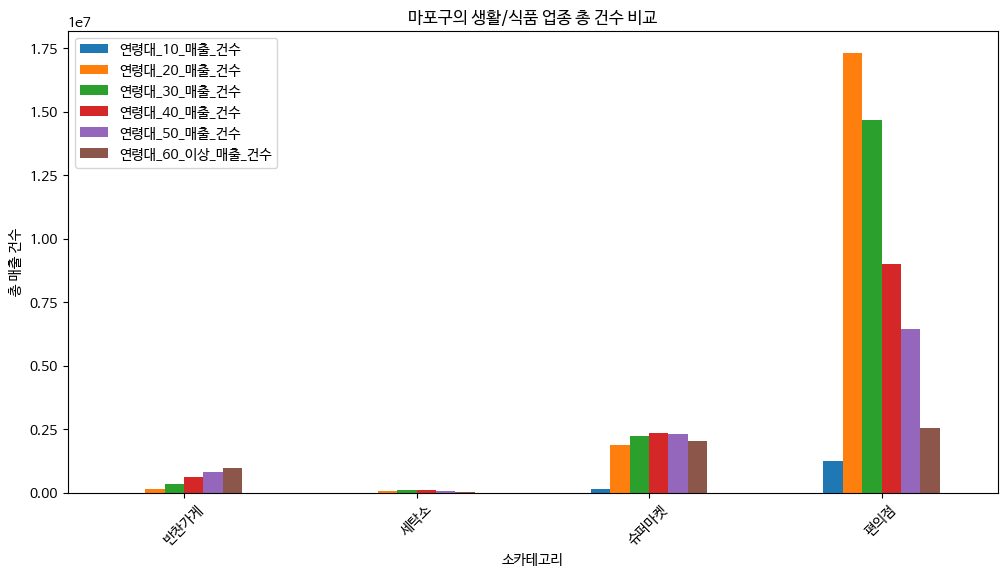

In [ ]:
grouped = df_mapo[df_mapo['카테고리'] == '생활/식품']
grouped = grouped.groupby('서비스_업종_코드_명')[age_SC].sum()
grouped

# 필요한 열만 선택
selected_columns = ['연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수', '연령대_40_매출_건수', '연령대_50_매출_건수', '연령대_60_이상_매출_건수']
grouped = grouped[selected_columns]

# 막대 그래프 그리기
grouped.plot(kind='bar', figsize=(12, 6))
plt.title('마포구의 생활/식품 업종 총 건수 비교')
plt.xlabel('소카테고리')
plt.ylabel('총 매출 건수')
plt.xticks(rotation=45)

plt.show()

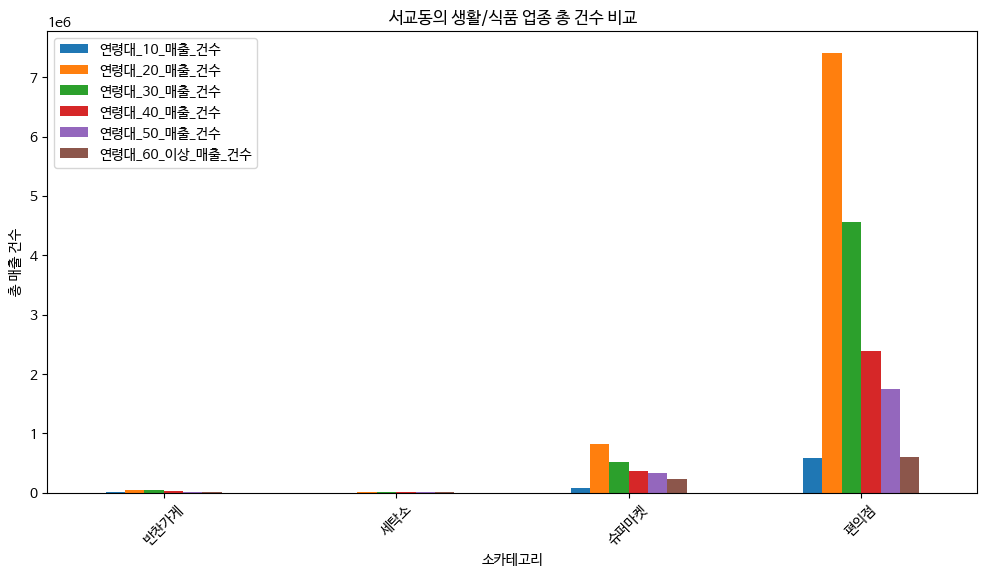

In [ ]:
grouped = df_seo[df_seo['카테고리'] == '생활/식품']
grouped = grouped.groupby('서비스_업종_코드_명')[age_SC].sum()
grouped

# 필요한 열만 선택
selected_columns = ['연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수', '연령대_40_매출_건수', '연령대_50_매출_건수', '연령대_60_이상_매출_건수']
grouped = grouped[selected_columns]

# 막대 그래프 그리기
grouped.plot(kind='bar', figsize=(12, 6))
plt.title('서교동의 생활/식품 업종 총 건수 비교')
plt.xlabel('소카테고리')
plt.ylabel('총 매출 건수')
plt.xticks(rotation=45)

plt.show()

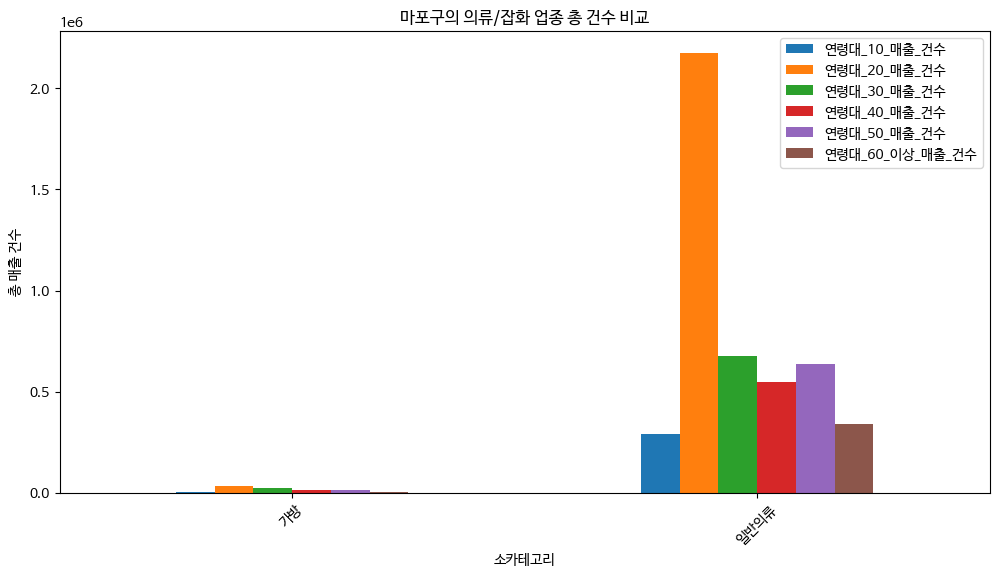

In [ ]:
grouped = df_mapo[df_mapo['카테고리'] == '의류/잡화']
grouped = grouped.groupby('서비스_업종_코드_명')[age_SC].sum()
grouped

# 필요한 열만 선택
selected_columns = ['연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수', '연령대_40_매출_건수', '연령대_50_매출_건수', '연령대_60_이상_매출_건수']
grouped = grouped[selected_columns]

# 막대 그래프 그리기
grouped.plot(kind='bar', figsize=(12, 6))
plt.title('마포구의 의류/잡화 업종 총 건수 비교')
plt.xlabel('소카테고리')
plt.ylabel('총 매출 건수')
plt.xticks(rotation=45)

plt.show()

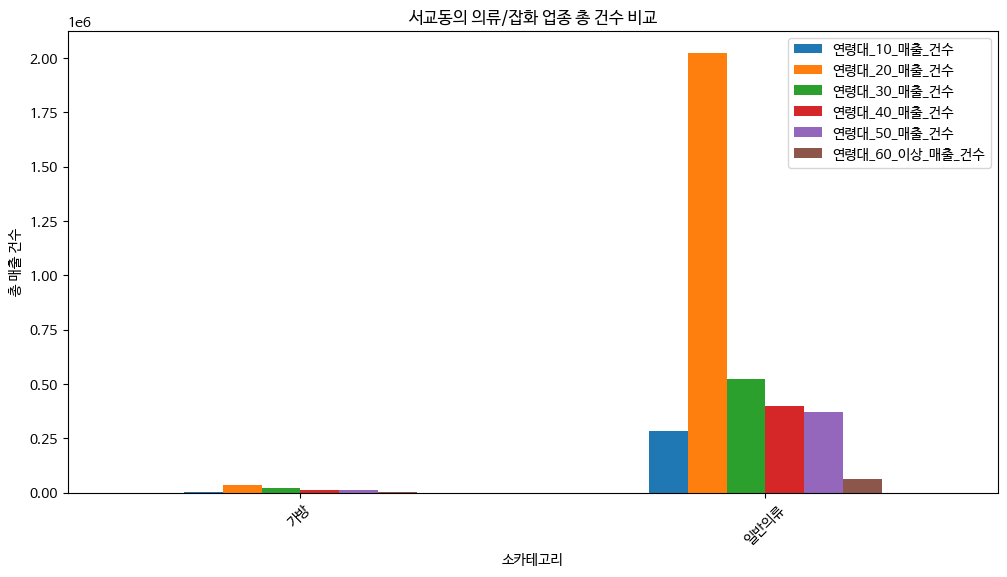

In [ ]:
grouped = df_seo[df_seo['카테고리'] == '의류/잡화']
grouped = grouped.groupby('서비스_업종_코드_명')[age_SC].sum()
grouped

# 필요한 열만 선택
selected_columns = ['연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수', '연령대_40_매출_건수', '연령대_50_매출_건수', '연령대_60_이상_매출_건수']
grouped = grouped[selected_columns]

# 막대 그래프 그리기
grouped.plot(kind='bar', figsize=(12, 6))
plt.title('서교동의 의류/잡화 업종 총 건수 비교')
plt.xlabel('소카테고리')
plt.ylabel('총 매출 건수')
plt.xticks(rotation=45)

plt.show()

In [ ]:
grouped = df_seo[df_seo['카테고리'] == '의류/잡화']
grouped = grouped.groupby('서비스_업종_코드_명')[age_SC].sum()
grouped

# 필요한 열만 선택
selected_columns = ['연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수', '연령대_40_매출_건수', '연령대_50_매출_건수', '연령대_60_이상_매출_건수']
grouped = grouped[selected_columns]

# 막대 그래프 그리기
grouped.plot(kind='bar', figsize=(12, 6))
plt.title('서교동의 의류/잡화 업종 총 건수 비교')
plt.xlabel('소카테고리')
plt.ylabel('총 매출 건수')
plt.xticks(rotation=45)

plt.show()

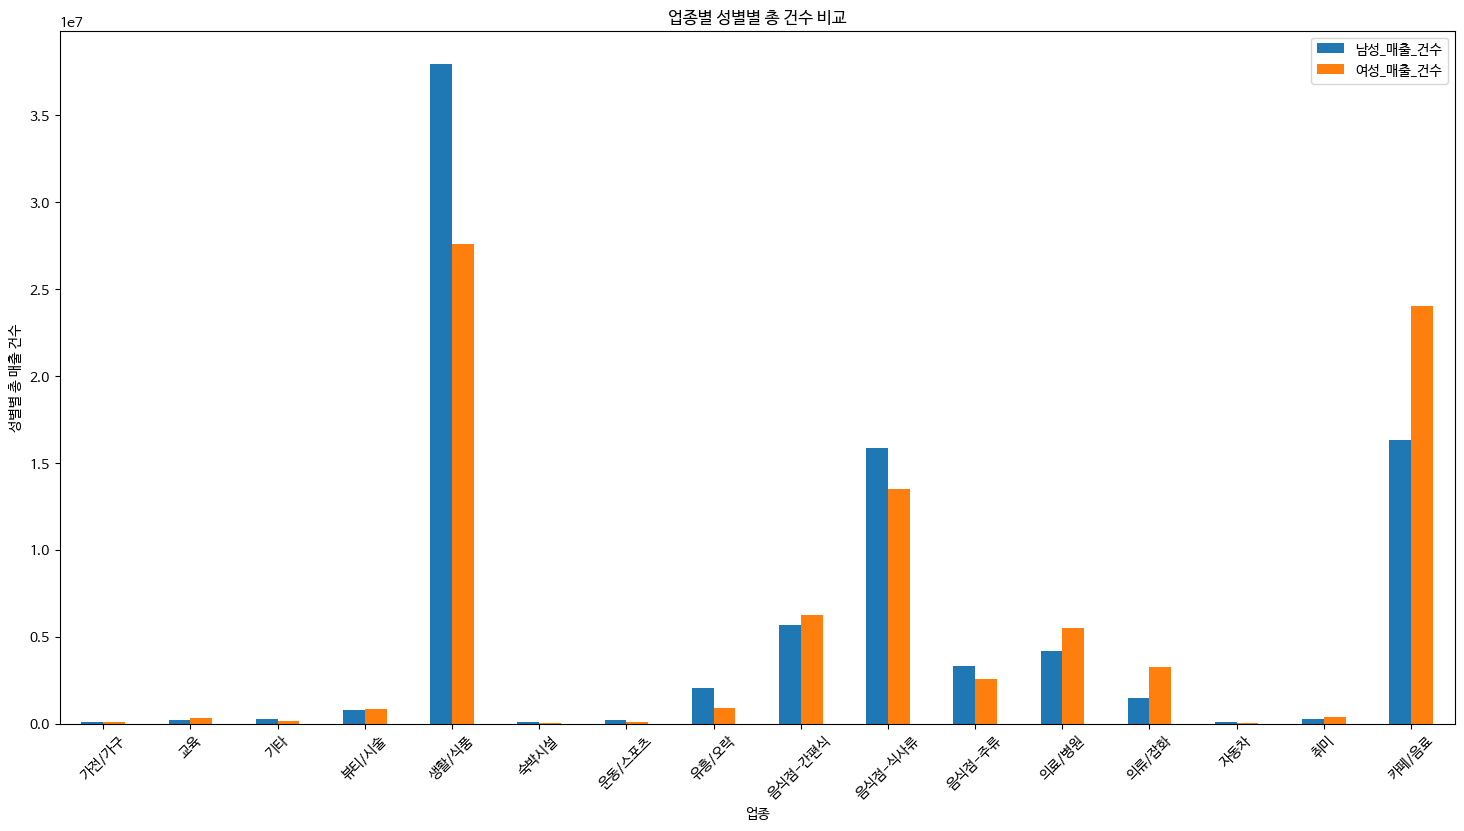

In [ ]:
#  '업종' 열을 기준으로 그룹화
grouped = df.groupby('카테고리')

# 각 그룹에서 연령대별 매출 금액 열을 선택하고 합계 계산
gender_columns = [
    '남성_매출_건수',
    '여성_매출_건수',

]
gender_sums = grouped[gender_columns].sum()
# 시각화
gender_sums.plot(kind='bar', figsize=(18, 9))
plt.title('업종별 성별별 총 건수 비교')
plt.xlabel('업종')
plt.ylabel('성별별 총 매출 건수')
plt.xticks(rotation=45)
plt.show()

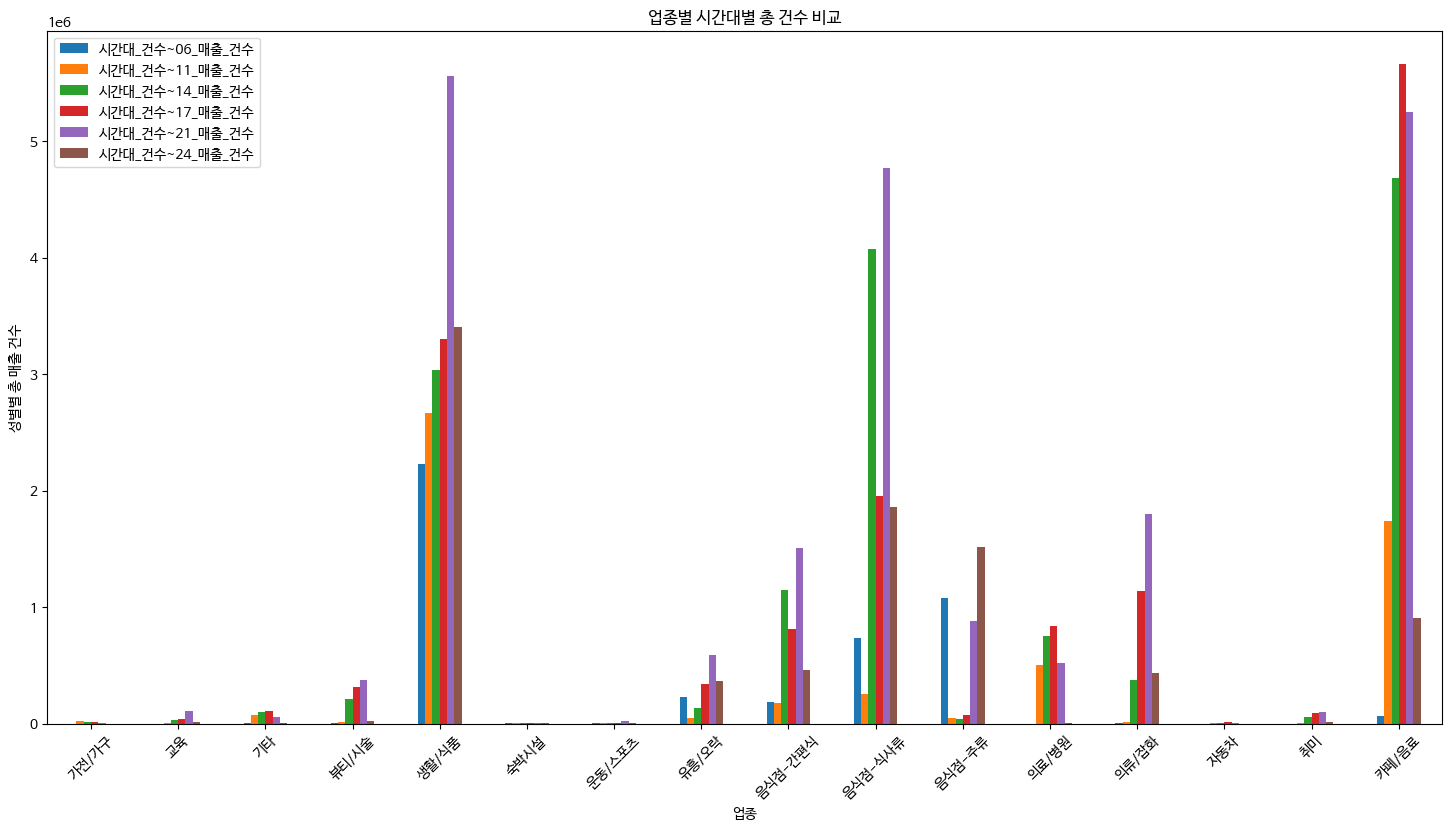

In [ ]:
# 데이터프레임을 '업종' 열을 기준으로 그룹화
grouped = df.groupby('카테고리')
gender_sums = grouped[day_SC].sum()

# 시각화
gender_sums.plot(kind='bar', figsize=(18, 9))
plt.title('업종별 시간대별 총 건수 비교')
plt.xlabel('업종')
plt.ylabel('성별별 총 매출 건수')
plt.xticks(rotation=45)
plt.show()

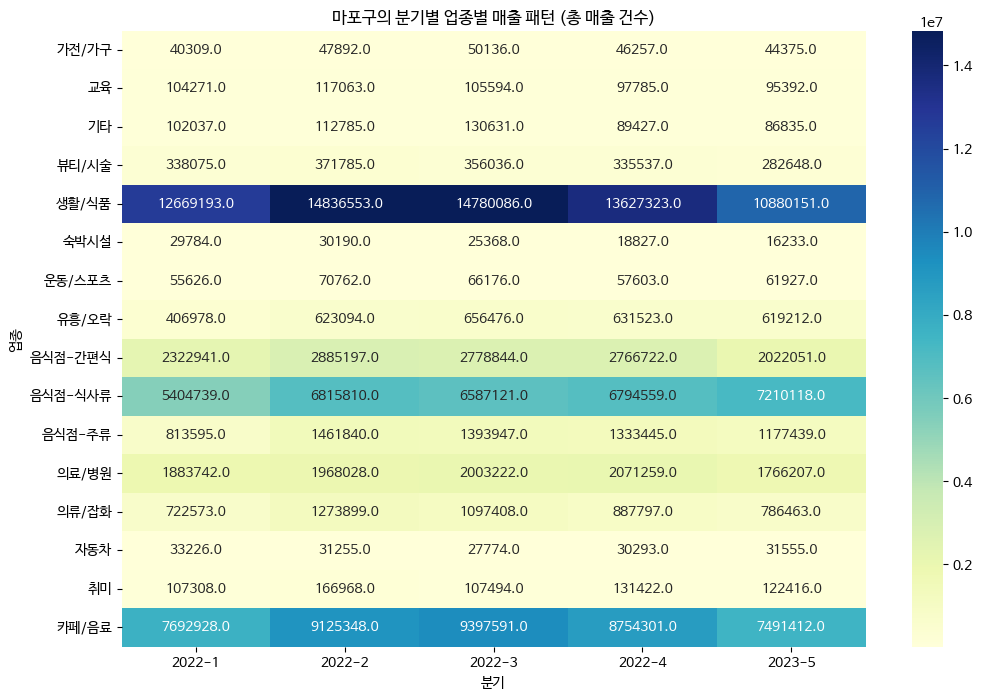

In [ ]:
# 업종 카테고리별로 그룹화하여 분기당 매출 건수 계산
category_sales = df_mapo.groupby(['카테고리', '기준_년_코드', '기준_분기_코드'])[['분기당_매출_건수']].sum().reset_index()

# 피벗 테이블을 이용하여 데이터를 재구성
heatmap_data = category_sales.pivot(index='카테고리', columns=['기준_년_코드', '기준_분기_코드'], values='분기당_매출_건수')

# 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('마포구의 분기별 업종별 매출 패턴 (총 매출 건수)')
plt.xlabel('분기')
plt.ylabel('업종')
plt.show()

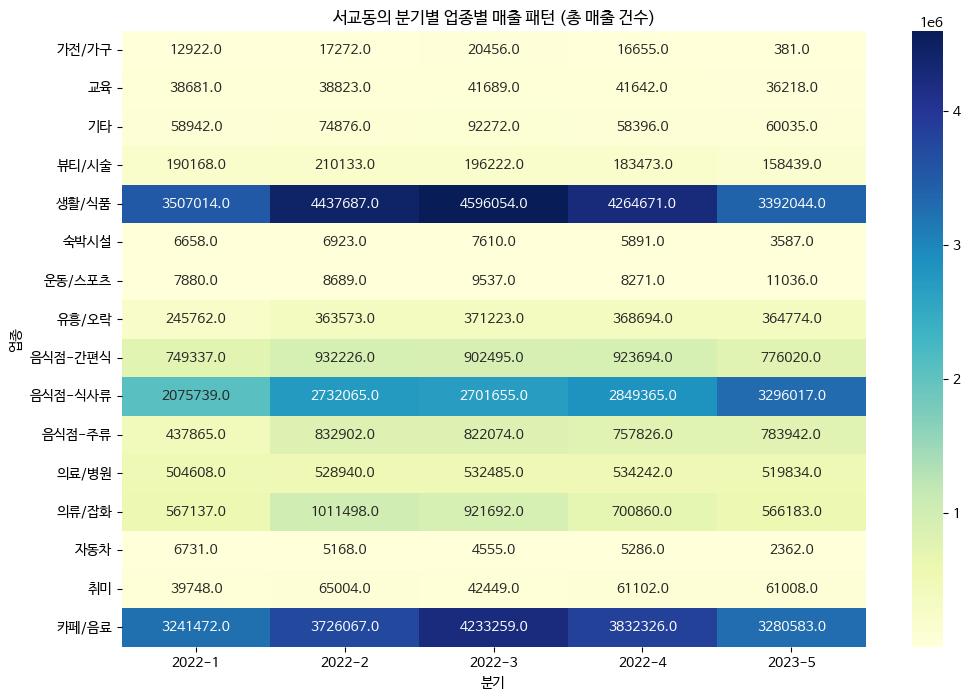

In [ ]:
# 업종 카테고리별로 그룹화하여 분기당 매출 건수 계산
category_sales = df_seo.groupby(['카테고리', '기준_년_코드', '기준_분기_코드'])[['분기당_매출_건수']].sum().reset_index()

# 피벗 테이블을 이용하여 데이터를 재구성
heatmap_data = category_sales.pivot(index='카테고리', columns=['기준_년_코드', '기준_분기_코드'], values='분기당_매출_건수')

# 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('서교동의 분기별 업종별 매출 패턴 (총 매출 건수)')
plt.xlabel('분기')
plt.ylabel('업종')
plt.show()

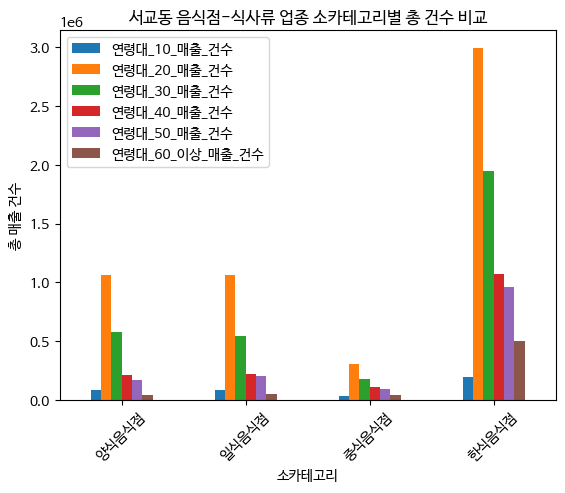

In [ ]:
grouped2 = df_seo[df_seo['카테고리'] == '음식점-식사류']
grouped2 = grouped2.groupby('서비스_업종_코드_명')[age_SC].sum()
grouped2

# 필요한 열만 선택
selected_columns = ['연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수', '연령대_40_매출_건수', '연령대_50_매출_건수', '연령대_60_이상_매출_건수']
grouped2 = grouped2[selected_columns]

# 막대 그래프 그리기
# plt.subplot(2,2,3)
grouped2.plot(kind='bar')
plt.title('서교동 음식점-식사류 업종 소카테고리별 총 건수 비교')
plt.xlabel('소카테고리')
plt.ylabel('총 매출 건수')
plt.xticks(rotation=45)
plt.show()

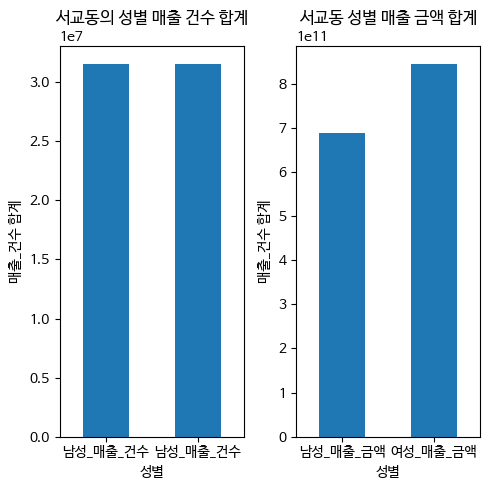

In [ ]:
# 서교동 성별 매출 비교
sex_SA = ['남성_매출_금액','여성_매출_금액']
sex_SC = ['남성_매출_건수','남성_매출_건수']
# 서교동 데이터프레임
df_seo

# 시간대 매출 금액 및 건수 비교
sex_sa_data = df_seo[sex_SA]
sex_sc_data = df_seo[sex_SC]

# 시간대 매출  합계 계산
total_sex_sa_data = sex_sa_data.sum()
total_sex_sc_data = sex_sc_data.sum()

# 그래프 그리기
plt.figure(figsize=(5, 5))

# 첫 번째 그래프: 시간대 매출_건수 합계
plt.subplot(1, 2, 1)
total_sex_sc_data.plot(kind='bar')
plt.xlabel('성별')
plt.ylabel('매출_건수 합계')
plt.title('서교동의 성별 매출 건수 합계')
plt.xticks(rotation=0)

# 두 번째 그래프: 시간대 매출_금액 합계
plt.subplot(1, 2, 2)
total_sex_sa_data.plot(kind='bar')
plt.xlabel('성별')
plt.ylabel('매출_건수 합계')
plt.title('서교동 성별 매출 금액 합계')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# 서교동 매출높은 업종확인 :
매출건수 : 생활/식품 --> 카페/음료 <br>
매출금액 : 음식점-간편식 --> 생활/식품


# 서교동 매출높은 요일 확인 :
매출건수 : 토요일 <br>
매출금액 : 토요일

# 서교동 매출높은 연령대 확인 :
매출건수 : 20대 <br>
매출금액 : 20대

# 서교동 매출높은 시간대 확인 :
매출건수 : 17 ~ 21시간대   --> 카페/음료  <br>
매출금액 : 17 ~ 21시간대

# 서교동 매출높은 성별 확인 :
매출건수 : 남녀동일 <br>
매출금액 : 여성이 더 많음